<a href="https://colab.research.google.com/github/SudhakarAnemu/AI-DS-ML-DL/blob/master/DL_TensroFlow_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
print("js")

js


# Importing all required Libraries

In [0]:
%tensorflow_version 2.x

In [111]:
!pip install tensorflow
!pip install scikit-learn
!pip install tensorflow-datasets

In [0]:
import tensorflow as tf

In [113]:
print("Version of the Tenserflow : ", tf.__version__)

Version of the Tenserflow :  2.1.0-rc1


##Section 4

### Example 1

Import all relevant libraries

In [114]:
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # nice graphs
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs
print("Import done")

Import done


Generate random input data to train on.
<br>we are about to create a two variable linear model :<br>f(x,z) = a*x +b*z +c
<br>From the linear model: inputs = n * k = 1000*2
<br>

In [115]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs, zs)) # define like a matrix
print("shape of the inputs(its like Matrix) : ", inputs.shape)

shape of the inputs(its like Matrix) :  (1000, 2)


Create the targets we will aim at
<br> targets = f(x,z) = 2*x - 3*z + 5 + noise
<br> here 2,3 are weights and 5 is the bias
<br> noise will always be there in the real data. 


In [116]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print("shape of the targets : ", targets.shape)
# print("Sample data : ", targets

shape of the targets :  (1000, 1)


In [117]:
print(targets.any)

<built-in method any of numpy.ndarray object at 0x7eff1bc70800>


Plot the training data
<br>The point is to see that there is a strong trend that out model should learn to reproduce
<br>

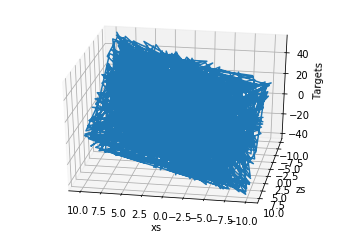

In [118]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Initialize variables
<br>Our initial weights and biases will be picked randomly from the interval [-0.1,0.1]
<br>weights : matrix, biases : scaler
<br>

In [119]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2,1))
print("Weights : ", weights)
biases = np.random.uniform(-init_range, init_range, size=1)
print("Biases : ", biases)

Weights :  [[-0.08685477]
 [ 0.05940344]]
Biases :  [0.04676931]


Set a learning rate(eta)
<br>

In [0]:
learning_rate = 0.02 #we can play with different learning rates

Train the model
<br>Procedure will be repeated.
<br>Game plan for each iteration
<br>1. calculate outputs
<br>2. compare outputs to targets through the loss
<br>3. print the loss
<br>4. Adjust weights and biases
<br>

In [121]:
for i in range(5000):
  outputs = np.dot(inputs, weights) + biases # y = mx + c - 1000*1 1000*2  2*1  scalar
  deltas = outputs - targets # deltas represents the diff between outputs and input targets
  loss = np.sum(deltas ** 2) / 2 / observations
  print("losss : ", loss)
  deltas_scaled = deltas / observations
  weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
  biases = biases - learning_rate * np.sum(deltas_scaled)

losss :  253.86587315229096
losss :  32.80117338399911
losss :  13.2942240305742
losss :  11.19909652966721
losss :  10.625603940646378
losss :  10.199523468772167
losss :  9.801161006370432
losss :  9.419520789894829
losss :  9.053076352957149
losss :  8.701150051780228
losss :  8.36316026738519
losss :  8.038554530011856
losss :  7.726802793208222
losss :  7.427396049082738
losss :  7.13984545037085
losss :  6.863681507992402
losss :  6.598453324108052
losss :  6.343727855892121
losss :  6.099089208492074
losss :  5.864137955989163
losss :  5.6384904892484755
losss :  5.421778389593432
losss :  5.21364782728196
losss :  5.013758983802334
losss :  4.821785497045352
losss :  4.637413928447086
losss :  4.460343251232081
losss :  4.290284358921521
losss :  4.1269595933039
losss :  3.9701022910974553
losss :  3.819456348564233
losss :  3.6747758033649114
losss :  3.5358244329716744
losss :  3.4023753689834217
losss :  3.274210726713677
losss :  3.151121249446319
losss :  3.032905966778398

Print weight and biases and see if we have worked correctionly 
<br> Play around with the code for homework.
<br>1. number of observations
<br>2. leanring rate
<br>3. Number of iterations
<br>4. initial range for initializing weights and biases

In [122]:
print("weight : ", weights, " biases : ", biases)


weight :  [[ 2.00250543]
 [-2.99682084]]  biases :  [4.99921721]


Plot last output vs target

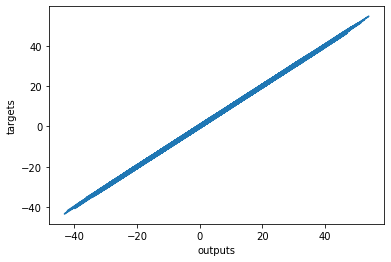

In [123]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

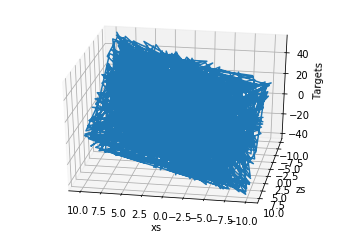

In [124]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Section 5

Same ex with TF
Minimal ex with TF
<br> Import the relevanth libraries

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("Import done")

Import done


Data generation

In [0]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


Solving with TensorFlow

In [0]:
training_data = np.load('TF_intro.npz')

In [128]:
# input_size = 2
# output_size = 1

# model = tf.keras.Sequential([
#                              tf.keras.layers.Dense(output_size)
# ])

# model.compile(optimizer = 'sgd', loss='mean_squared_error')

# model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)

##### the only diff is that verbose=0 / 2

input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 31.8716
Epoch 2/100
1000/1000 - 0s - loss: 4.4005
Epoch 3/100
1000/1000 - 0s - loss: 1.4554
Epoch 4/100
1000/1000 - 0s - loss: 0.6408
Epoch 5/100
1000/1000 - 0s - loss: 0.4287
Epoch 6/100
1000/1000 - 0s - loss: 0.3693
Epoch 7/100
1000/1000 - 0s - loss: 0.3533
Epoch 8/100
1000/1000 - 0s - loss: 0.3483
Epoch 9/100
1000/1000 - 0s - loss: 0.3482
Epoch 10/100
1000/1000 - 0s - loss: 0.3449
Epoch 11/100
1000/1000 - 0s - loss: 0.3544
Epoch 12/100
1000/1000 - 0s - loss: 0.3477
Epoch 13/100
1000/1000 - 0s - loss: 0.3469
Epoch 14/100
1000/1000 - 0s - loss: 0.3483
Epoch 15/100
1000/1000 - 0s - loss: 0.3478
Epoch 16/100
1000/1000 - 0s - loss: 0.3467
Epoch 17/100
1000/1000 - 0s - loss: 0.3535
Epoch 18/100
1000/1000 - 0s - loss: 0.3532
Epoch 19/100
1000/1000 - 0s - loss: 0.3481
Epoch 20/100
1000/1000 - 0s - loss: 0.3483
Epoch 21/100
1000/1000 - 0s - loss: 0.3516
Epoch 22/100
1000/1000 - 0s - loss: 0.3447
Epoch 23/100
1000/1000 - 0s - loss: 0.34

In [129]:
model.layers[0].get_weights()

[array([[ 2.0021186],
        [-3.0307753]], dtype=float32), array([5.000602], dtype=float32)]

In [130]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0021186],
       [-3.0307753]], dtype=float32)

In [131]:
bias = model.layers[0].get_weights()[1]
bias

array([5.000602], dtype=float32)

Extract the outputs (make predictions)

In [132]:
# model.predict_on_batch(training_data['inputs']).round(1)
model.predict_on_batch(training_data['inputs'])


<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[-1.98400841e+01],
       [-1.12161760e+01],
       [-1.57597952e+01],
       [ 2.27840385e+01],
       [ 1.85524635e+01],
       [-4.69786644e-01],
       [ 3.67428350e+00],
       [-5.18895149e+00],
       [ 2.64527435e+01],
       [ 1.73088951e+01],
       [ 3.45459137e+01],
       [ 3.81201553e+01],
       [-1.66824760e+01],
       [-1.25298548e+00],
       [-4.30704727e+01],
       [ 1.89156795e+00],
       [ 1.44132395e+01],
       [ 4.37294617e+01],
       [ 2.12777824e+01],
       [-3.55478935e+01],
       [ 4.08107262e+01],
       [ 1.36552143e+00],
       [-2.12924576e+01],
       [ 1.40338392e+01],
       [-1.66419334e+01],
       [-8.58236599e+00],
       [ 3.60922527e+00],
       [ 4.35188866e+01],
       [-3.20047035e+01],
       [-1.91579399e+01],
       [ 3.18349934e+00],
       [ 2.81531067e+01],
       [ 1.78464031e+01],
       [ 3.28593178e+01],
       [-3.94231987e+00],
       [-2.07732887e+01],
       [ 2.68

In [133]:
training_data['targets'].round(1)

array([[-20.1],
       [-10.4],
       [-15.9],
       [ 23.1],
       [ 17.6],
       [ -0.8],
       [  3.5],
       [ -4.8],
       [ 26.4],
       [ 18. ],
       [ 33.5],
       [ 38.7],
       [-16.2],
       [ -1.2],
       [-43.4],
       [  2.8],
       [ 14. ],
       [ 43.5],
       [ 21.5],
       [-35.9],
       [ 41.3],
       [  2.2],
       [-20.7],
       [ 14.8],
       [-16.6],
       [ -9. ],
       [  3.7],
       [ 43.1],
       [-31.6],
       [-18.4],
       [  2.5],
       [ 28.6],
       [ 18.3],
       [ 32.1],
       [ -3.1],
       [-21.4],
       [ 26.5],
       [-27.5],
       [ -0.5],
       [-35.8],
       [ 22.1],
       [ 39.1],
       [  2.7],
       [ 30.7],
       [-14.1],
       [-18. ],
       [ 41.2],
       [-35.3],
       [ 18.4],
       [-13.9],
       [ 18.3],
       [-13.1],
       [ 10.6],
       [-20.9],
       [-17.1],
       [-30.8],
       [ 15. ],
       [ 23.5],
       [ 48. ],
       [ 24.5],
       [-33.4],
       [-13.4],
       [

Plotting the data

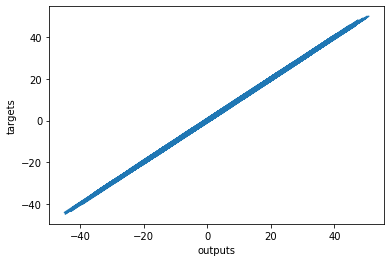

In [134]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Section 12 - The MNIST example

Import the relavent packages

In [135]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
print("Import done")

Import done


Data

In [0]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
# Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.

Training, Test and Validation datasets

In [137]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

# Transforming the values
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label

# scale whole train data and store it in a variable
scaled_train_and_validation_data = mnist_train.map(scale)

# scale whole test data 
test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))
# validation_inputs, validation_targets = next(iter(validation_data))

print("done")


done


Model - Outline the model

In [138]:
input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(output_size,activation='softmax')
])

print("done")

done


Choose the optimizer and the loss function

In [139]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("done")

done


Training

In [140]:

NUM_EPOCHS = 5

model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2, validation_steps=10)

Epoch 1/5
540/540 - 13s - loss: 0.4174 - accuracy: 0.8812 - val_loss: 0.2229 - val_accuracy: 0.9383
Epoch 2/5
540/540 - 13s - loss: 0.1820 - accuracy: 0.9476 - val_loss: 0.1679 - val_accuracy: 0.9488
Epoch 3/5
540/540 - 13s - loss: 0.1398 - accuracy: 0.9586 - val_loss: 0.1386 - val_accuracy: 0.9582
Epoch 4/5
540/540 - 13s - loss: 0.1147 - accuracy: 0.9669 - val_loss: 0.1182 - val_accuracy: 0.9657
Epoch 5/5
540/540 - 13s - loss: 0.0981 - accuracy: 0.9705 - val_loss: 0.0966 - val_accuracy: 0.9700


Test the Model

In [144]:
test_loss, test_accuracy = model.evaluate(test_data)

      1/Unknown - 2s 2s/step - loss: 0.1068 - accuracy: 0.9672

In [143]:
print("Test loss : ", test_loss)
print("Test accuracy : ", test_accuracy) 

Test loss :  0.10677008330821991
Test accuracy :  0.9672
